# Distribuição Normal

Gaussiana, curva de sino

* simétrica
* média = mediana = moda
* variáveis contínuas

Ex:
* altura e peso de uma população
* tamanho do crânio de recém nascidos
* pressão sanguínea

$$ p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right] $$


In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# Font Sizes 
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('figure', figsize = (8, 6)) # Figure Size

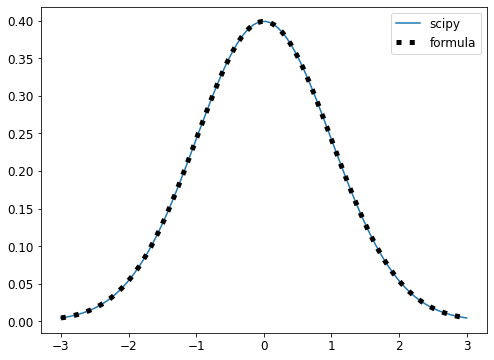

In [ ]:
import numpy as np
from scipy.stats import norm
import math


mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

p = 1/np.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x, norm.pdf(x, mu, sigma), label='scipy')
plt.plot(x, p, 'k:', lw=5, label='formula')

plt.legend();

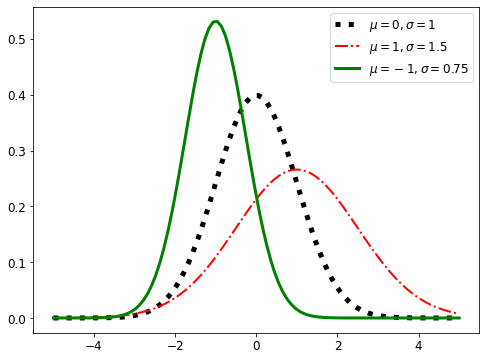

In [ ]:
x = np.linspace(-5, 5, 100)

mu = 0
sigma = 1
plt.plot(x,norm.pdf(x, mu, sigma), 'k:', lw=5, 
         label=r'$\mu={}, \sigma={}$'.format(mu,sigma))

mu = 1
sigma = 1.5
plt.plot(x,norm.pdf(x, mu, sigma), 'r-.', lw=2, 
         label=r'$\mu={}, \sigma={}$'.format(mu,sigma))

mu = -1
sigma = .75
plt.plot(x,norm.pdf(x, mu, sigma), 'g', lw=3, 
         label=r'$\mu={}, \sigma={}$'.format(mu,sigma))


plt.legend();

Z_score

$$ z_i = \frac{x_i-\bar{x}}{\sigma} $$

# Distribuição

* Variáveis Contínuas
 * Normal
 * Exponencial
 * Gamma

* Variáveis Discretas
 * Binomial
 * Poisson

# Distribuição binomial

* variáveis discretas
* dois resultados possíveis de igual chance de ocorrência
* eventos finitos e independentes

Ex.:
* Dado
* Moeda


$$ p(k|n,p) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $$

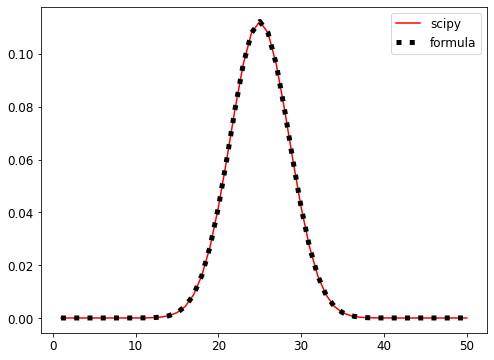

In [ ]:
from math import factorial
from scipy.stats import binom

n = 50 
p = 0.5
k_vec = np.arange(1,n+1) # target, starts at 1 goes to n, all possible outcomes

def compute_binomial_prob(n,k,p):
  return factorial(n)/(factorial(k)*factorial(n-k)) * p**k * (1-p)**(n-k)

P_vec = [compute_binomial_prob(n,k,p) for k in k_vec]

plt.plot(k_vec, binom.pmf(k_vec, n, p), 'r', label='scipy')
plt.plot(k_vec, P_vec, 'k:', lw=5, label='formula')




plt.legend();


Ex: https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

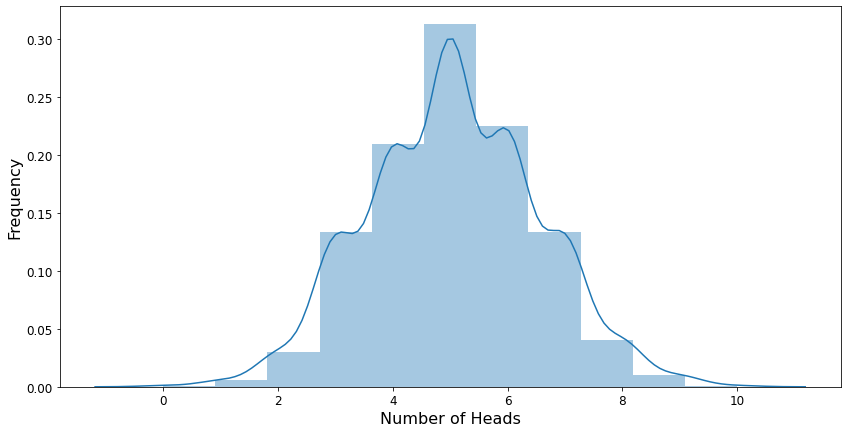

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input variables
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = 10
# Probability of success for each experiment
p = 0.5
# Function that runs our coin toss trials (Monte Carlo)
# heads is a list of the number of successes from each trial of n experiments
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads
# Run the function
heads = run_binom(trials, n, p)
# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16);

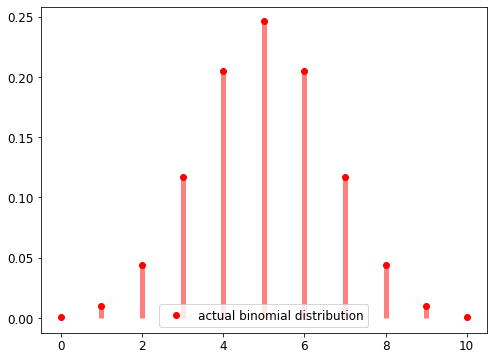

In [ ]:
# Plot the actual binomial distribution as a sanity check
from scipy.stats import binom
x = range(0,11)
plt.plot(x, binom.pmf(x, n, p), 'ro', label='actual binomial distribution')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Probability of getting 6 heads
runs = 10000
prob_6 = sum([1 for i in np.random.binomial(n, p, size=runs) if i==6])/runs
print('The probability of 6 heads is: ' + str(prob_6))

The probability of 6 heads is: 0.201


In [ ]:
# Call Center Simulation
# Number of employees to simulate
employees = 100
# Cost per employee
wage = 200
# Number of independent calls per employee
n = 50
# Probability of success for each call
p = 0.04
# Revenue per call
revenue = 100
# Binomial random variables of call center employees
conversions = np.random.binomial(n, p, size=employees)
# Print some key metrics of our call center
print('Average Conversions per Employee: ' + str(round(np.mean(conversions), 2)))
print('Standard Deviation of Conversions per Employee: ' + str(round(np.std(conversions), 2)))
print('Total Conversions: ' + str(np.sum(conversions)))
print('Total Revenues: ' + str(np.sum(conversions)*revenue))
print('Total Expense: ' + str(employees*wage))
print('Total Profits: ' + str(np.sum(conversions)*revenue - employees*wage))

# Number of days to simulate
sims = 1000
sim_conversions = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_profits = np.array(sim_conversions)*revenue - employees*wage

Average Conversions per Employee: 1.72
Standard Deviation of Conversions per Employee: 1.28
Total Conversions: 172
Total Revenues: 17200
Total Expense: 20000
Total Profits: -2800


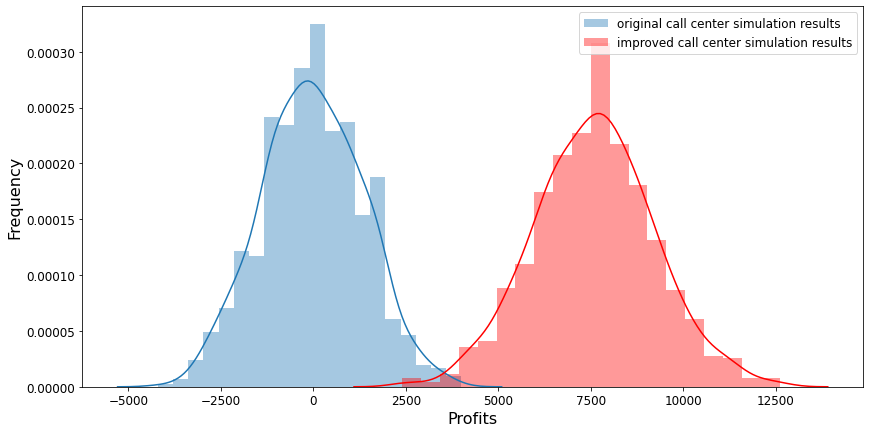

In [ ]:
# Call Center Simulation (Higher Conversion Rate)
# Number of employees to simulate
employees = 100
# Cost per employee
wage = 200
# Number of independent calls per employee
n = 55
# Probability of success for each call
p = 0.05
# Revenue per call
revenue = 100
# Binomial random variables of call center employees
conversions_up = np.random.binomial(n, p, size=employees)
# Simulate 1,000 days for our call center
# Number of days to simulate
sims = 1000

sim_conversions_up = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_profits_up = np.array(sim_conversions_up)*revenue - employees*wage
# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='original call center simulation results')
ax = sns.distplot(sim_profits_up, bins=20, label='improved call center simulation results', color='red')
ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend();

Ex: https://cmdlinetips.com/2018/03/probability-distributions-in-python/


https://www.probabilisticworld.com/discrete-probability-distributions-overview/

In [ ]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(4.5,3)})

# Uniform distribution

$$ P(x;n) = \frac{1}{n} $$

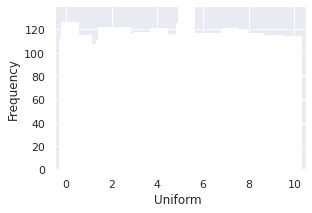

In [ ]:
# import uniform distribution
from scipy.stats import uniform

# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b) #random variables

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False, # density plot
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform ', ylabel='Frequency');

# Normal distribution

$$ p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right] $$

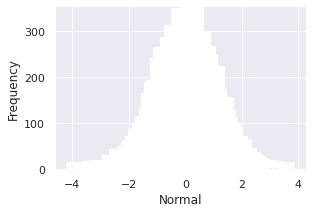

In [ ]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)  # loc = mean, scale = std

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency');

# Bernoulli distribution

Discrete. Outcome: 0 or 1.


\begin{equation}
P(x;p) = \begin{cases}
p &\text{if $x=1$}\\
1-p &\text{if $x=0$}
\end{cases}
\end{equation}


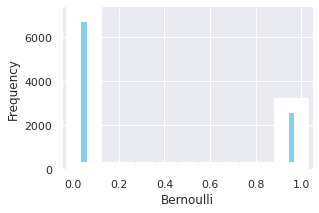

In [ ]:
# import bernoulli
from scipy.stats import bernoulli

# generate bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency');



# Binomial distribution

Discrete.
Obtains the number of successe from N Bernoulli trials.

$$ p(k|n,p) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $$

\begin{equation}
p(x; p,n) = \binom{n}{x}p^{x}(1-p)^{n-x}
\end{equation}

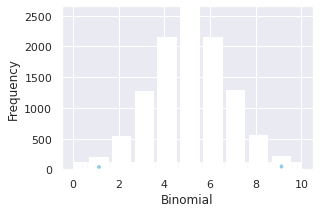

In [ ]:
from scipy.stats import binom

binom.rvs(n=10,p=0.5) # sucesses from n=10 Bernoulli trials with p=0.5


data_binom = binom.rvs(n=10,p=0.5,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency');


# Poisson distribution

number of times an event happened in a time interval

* rate of ocurrence (mu)

$$ P(x;\mu)=\frac{\mu^x e^{-\mu}}{x!} $$

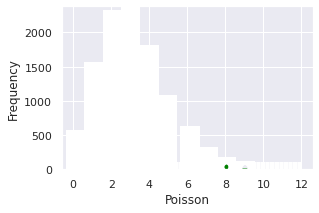

In [ ]:
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency');

# Beta distribution

* Continuous
* distribution for probabilities

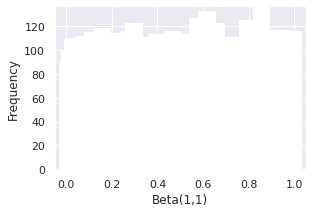

In [ ]:
from scipy.stats import beta

data_beta = beta.rvs(1, 1, size=10000) # ~ uniform
ax = sns.distplot(data_beta,
                  kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(1,1)', ylabel='Frequency');

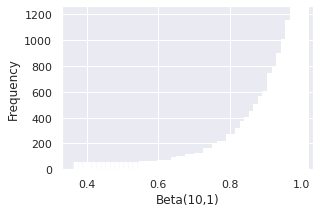

In [ ]:
data_beta_a10b1 = beta.rvs(10, 1, size=10000) #skewed right
ax = sns.distplot(data_beta_a10b1,
             kde=False,
             bins=50,
             color='skyblue',
             hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(10,1)', ylabel='Frequency');

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Beta(1,10)')]

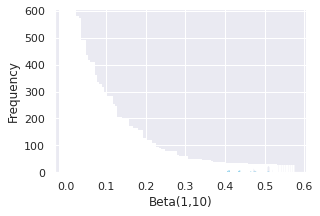

In [ ]:
data_beta_a1b10 = beta.rvs(1, 10, size=10000) # skewed leftt
ax = sns.distplot(data_beta_a1b10,
                kde=False,
                bins=100,
                color='skyblue',
                hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(1,10)', ylabel='Frequency');

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Beta(10,10)')]

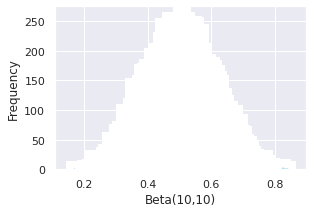

In [ ]:
data_beta_a10b10 = beta.rvs(10, 10, size=10000) # ~ normal
ax = sns.distplot(data_beta_a10b10,
                  kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(10,10)', ylabel='Frequency');

# Gamma distribution



In [1]:
from scipy.stats import gamma

data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma', ylabel='Frequency');

NameError: ignored

In [2]:
help(gamma)

Help on gamma_gen in module scipy.stats._continuous_distns object:

class gamma_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A gamma continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  erlang, expon
 |  
 |  Notes
 |  -----
 |  The probability density function for `gamma` is:
 |  
 |  .. math::
 |  
 |      f(x, a) = \frac{x^{a-1} \exp(-x)}{\Gamma(a)}
 |  
 |  for :math:`x \ge 0`, :math:`a > 0`. Here :math:`\Gamma(a)` refers to the
 |  gamma function.
 |  
 |  `gamma` takes ``a`` as a shape parameter for :math:`a`.
 |  
 |  When :math:`a` is an integer, `gamma` reduces to the Erlang
 |  distribution, and when :math:`a=1` to the exponential distribution.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      gamma_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, *a

# Lognormal distribution

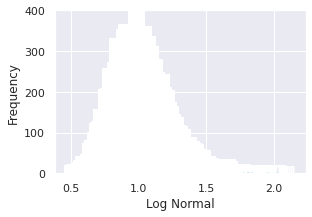

In [ ]:
from scipy.stats import lognorm

data_lognorm = lognorm.rvs(0.2, size=10000)
ax = sns.distplot(data_lognorm,kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Log Normal', ylabel='Frequency');

# Negative Binomial distribution
* discrete

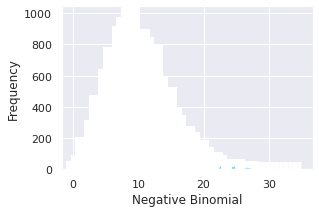

In [ ]:
from scipy.stats import nbinom

data_nbinom = nbinom.rvs(10, 0.5, size=10000)
ax = sns.distplot(data_nbinom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Negative Binomial', ylabel='Frequency');

# PDF e CDF
PDF: Função Densidade de Probabilidade
* relativa
* não negativa
* integral = 1

CDF: Função Distribuição Acumulada
* acumulada
* não negativa
* integral = 1

Survivor fuction = 1 - CDF

ECDF
* estimador empírico
